# Plot distribution of start positions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import EngFormatter
import matplotlib as mpl
plt.style.use('./nqo.mplstyle')

In [2]:
def read_bed_file(file):
    '''
    function to read a bed file into a pandas dataframe
    '''
    df = pd.read_csv(file,
                     sep='\t',
                     names=['chrom', 'start', 'end', 'read', 'q', 'strand'])
    
    # re-index start to 1
    df['start'] = df['start'] + 1

    # start in bis leftmost postition, get the actual start of the read
    new_starts = []
    new_ends = []

    # orient starts and ends depending on strand
    for column, row in df.iterrows():
        if row['strand'] == '+':
            new_start = row['start']
            new_end = row['end']
        elif row['strand'] == '-':
            new_start = row['end']
            new_end = row['start']
    
        new_starts.append(new_start)
        new_ends.append(new_end)
    
    df['start_read'] = new_starts
    df['end_read'] = new_ends

    return df

In [3]:
df_29 = read_bed_file('../data/aligned/to_ecobl21/Sample29.red.bed')

count_starts_29 = df_29['start'].value_counts().reset_index().sort_values('start')

# filter out lac loci (found in expression vector)
count_starts_29 = count_starts_29[~(count_starts_29['start'].between(332763, 337113) |
                                    count_starts_29['start'].between(748475, 750402) |
                                    count_starts_29['start'].between(332747, 337081))]

In [4]:
df_30 = read_bed_file('../data/aligned/to_ecobl21/Sample30.red.bed')

count_starts_30 = df_30['start'].value_counts().reset_index().sort_values('start')

# filter out lac loci (found in expression vector)
count_starts_30 = count_starts_30[~(count_starts_30['start'].between(332763, 337113) |
                                    count_starts_30['start'].between(748475, 750402) |
                                    count_starts_30['start'].between(332747, 337081))]

In [5]:
df_31 = read_bed_file('../data/aligned/to_ecobl21/Sample31.red.bed')

count_starts_31 = df_31['start'].value_counts().reset_index().sort_values('start')

# filter out lac loci (found in expression vector)
count_starts_31 = count_starts_31[~(count_starts_31['start'].between(332763, 337113) |
                                    count_starts_31['start'].between(748475, 750402) |
                                    count_starts_31['start'].between(332747, 337081))]

In [6]:
df_32 = read_bed_file('../data/aligned/to_ecobl21/Sample32.red.bed')

count_starts_32 = df_32['start'].value_counts().reset_index().sort_values('start')

# filter out lac loci (found in expression vector)
count_starts_32 = count_starts_32[~(count_starts_32['start'].between(332763, 337113) |
                                    count_starts_32['start'].between(748475, 750402) |
                                    count_starts_32['start'].between(332747, 337081))]

In [7]:
df_33 = read_bed_file('../data/aligned/to_ecobl21/Sample33.red.bed')

count_starts_33 = df_33['start'].value_counts().reset_index().sort_values('start')
# lac
count_starts_33 = count_starts_33[~(count_starts_33['start'].between(332763, 337113) |
                                    count_starts_33['start'].between(748475, 750402) |
                                    count_starts_33['start'].between(332747, 337081))]

In [8]:
df_34 = read_bed_file('../data/aligned/to_ecobl21/Sample34.red.bed')

count_starts_34 = df_34['start'].value_counts().reset_index().sort_values('start')
# lac
count_starts_34 = count_starts_34[~(count_starts_34['start'].between(332763, 337113) |
                                    count_starts_34['start'].between(748475, 750402) |
                                    count_starts_34['start'].between(332747, 337081))]

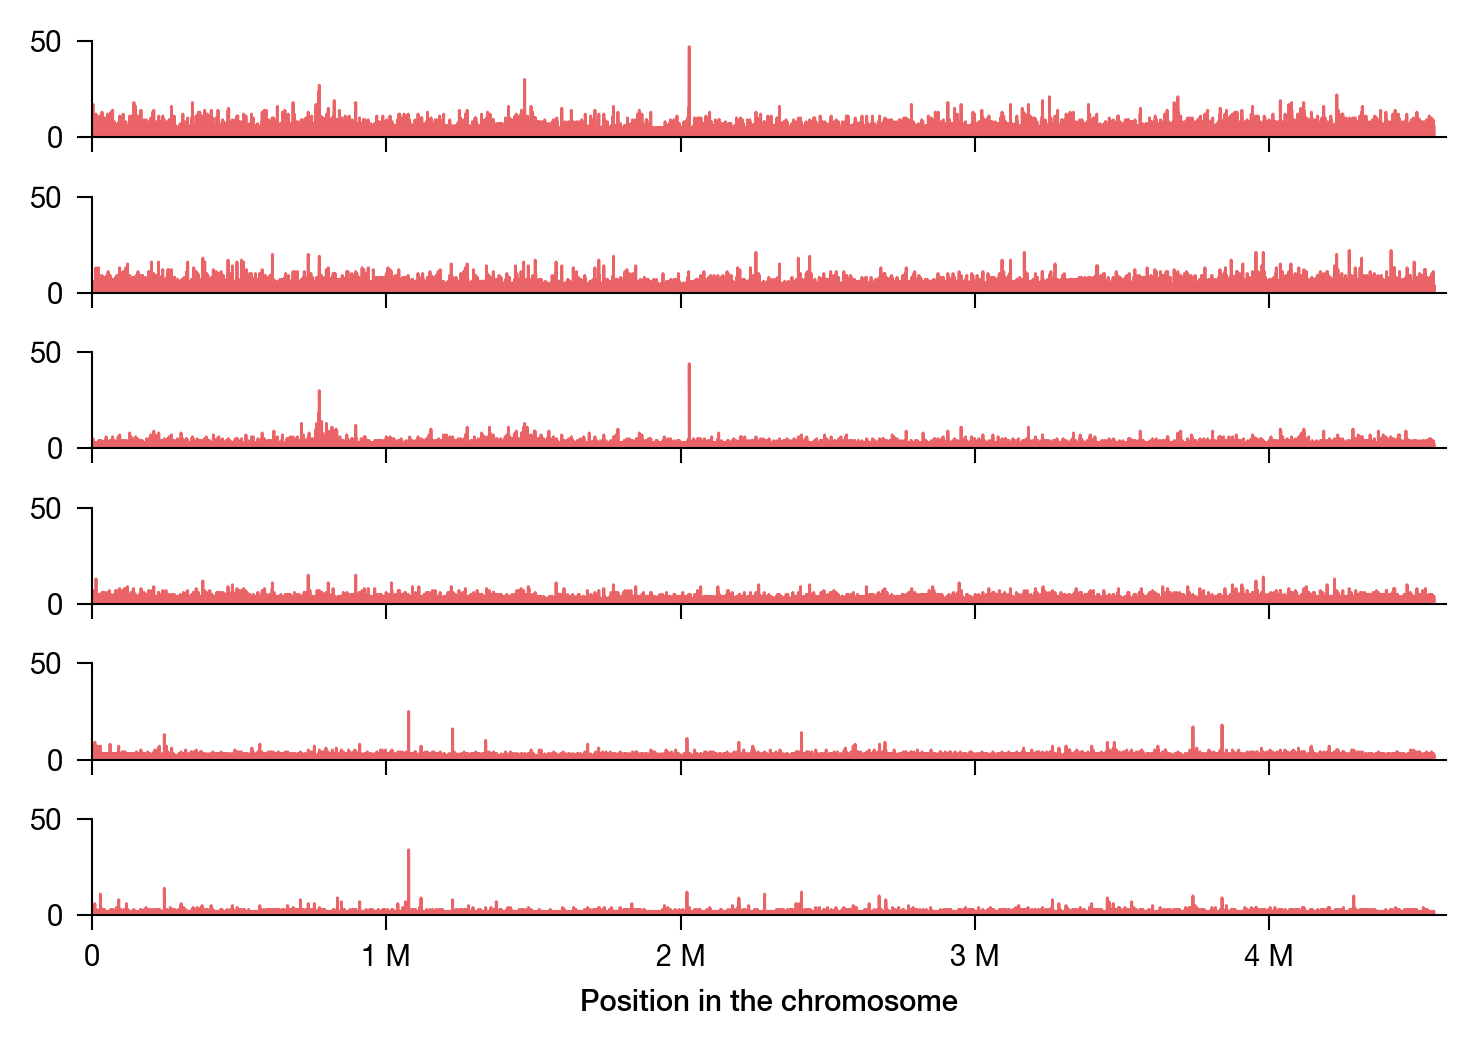

In [9]:
fig, axs = plt.subplots(6, 1, 
                        figsize=(4.93, 3.5),
                        sharex=True)

axs[0].plot(count_starts_29['start'], 
                    count_starts_29['count'],
                    color='#EA6467', 
                    linewidth=.7)

axs[0].set_ylim(0,50)

axs[1].plot(count_starts_30['start'], 
                    count_starts_30['count'],
                    color='#EA6467', 
                    linewidth=.7)

axs[1].set_ylim(0,50)

axs[2].plot(count_starts_31['start'], 
                    count_starts_31['count'],
                    color='#EA6467', 
                    linewidth=.7)

axs[2].set_ylim(0,50)

axs[3].plot(count_starts_32['start'], 
                    count_starts_32['count'],
                    color='#EA6467', 
                    linewidth=.7)

axs[3].set_ylim(0,50)

axs[4].plot(count_starts_33['start'], 
                    count_starts_33['count'],
                    color='#EA6467', 
                    linewidth=.7)

axs[4].set_ylim(0,50)

axs[5].plot(count_starts_34['start'], 
                    count_starts_34['count'],
                    color='#EA6467', 
                    linewidth=.7)

axs[5].set_ylim(0,50)

axs[5].xaxis.set_major_formatter(EngFormatter())
# axs[0].set_title('')
axs[5].set_xlim(0,4.6e6)
axs[5].set_xlabel('Position in the chromosome')

sns.despine() 

mpl.rcParams['path.simplify'] = True
mpl.rcParams['path.simplify_threshold'] = 0.2
plt.savefig('figs/start_counts.v2.svg')